# Convert English text from written expressions into spoken forms

### Source:Kaggles

#### Introduction:

Many speech and language applications, including text-to-speech synthesis (TTS) and automatic speech recognition (ASR), require text to be converted from written expressions into appropriate "spoken" forms. This is a process known as text normalization, and helps convert 12:47 to "twelve forty-seven" and $3.16 into "three dollars, sixteen cents."

# EDA

##### Import test and train dataset from csv

In [2]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib3
from scipy import stats
import seaborn as sns
plt.rcParams['figure.figsize'] = (30, 6)
sample=pd.read_csv("en_sample_submission.csv")
test=pd.read_csv("en_test.csv")
train=pd.read_csv("en_train.csv")

#### Top 5 rows of train dataset

In [3]:
train.head()

,sentence_id,token_id,class,before,after
0,0,0,PLAIN,Brillantaisia,Brillantaisia
1,0,1,PLAIN,is,is
2,0,2,PLAIN,a,a
3,0,3,PLAIN,genus,genus
4,0,4,PLAIN,of,of


#### Top 5 rows of test dataset

In [4]:
test.head()

,sentence_id,token_id,before
0,0,0,Another
1,0,1,religious
2,0,2,family
3,0,3,is
4,0,4,of


#### Top 5 rows of sample dataset

In [5]:
sample.head()

,id,after
0,0_0,Another
1,0_1,religious
2,0_2,family
3,0_3,is
4,0_4,of


#### Total number of train sentences

In [6]:
train_sentences = len(train.sentence_id.unique())
train_sentences

748066

#### Check length of train sentences

In [8]:
train_sentences = train.groupby("sentence_id")["sentence_id"].count()
train_sentences.describe()

count    748066.000000
mean         13.258778
std           6.071624
min           2.000000
25%           8.000000
50%          13.000000
75%          18.000000
max         256.000000
Name: sentence_id, dtype: float64

#### Using count plot, we find total words present in a particular position of the sentence in the train dataset

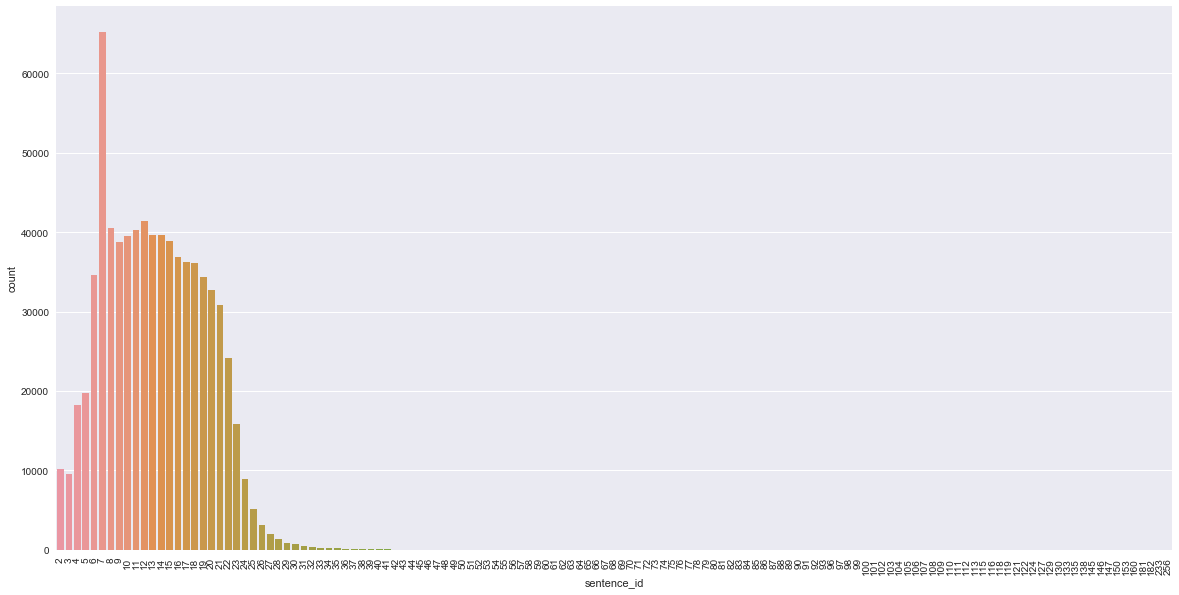

In [9]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.set_style("whitegrid")
count_length_fig = sns.countplot(train_sentences, ax=ax)
for item in count_length_fig.get_xticklabels():
    item.set_rotation(90)

#### Summary of the dataset:

In [10]:
#for test sentances
test_sentences = test.groupby("sentence_id")["sentence_id"].count()
test_sentences.describe()

count    70000.000000
mean        15.550914
std          5.763962
min          2.000000
25%         11.000000
50%         16.000000
75%         20.000000
max        249.000000
Name: sentence_id, dtype: float64

#### Using count plot, we find total words present in a particular position of the sentence in the tests dataset

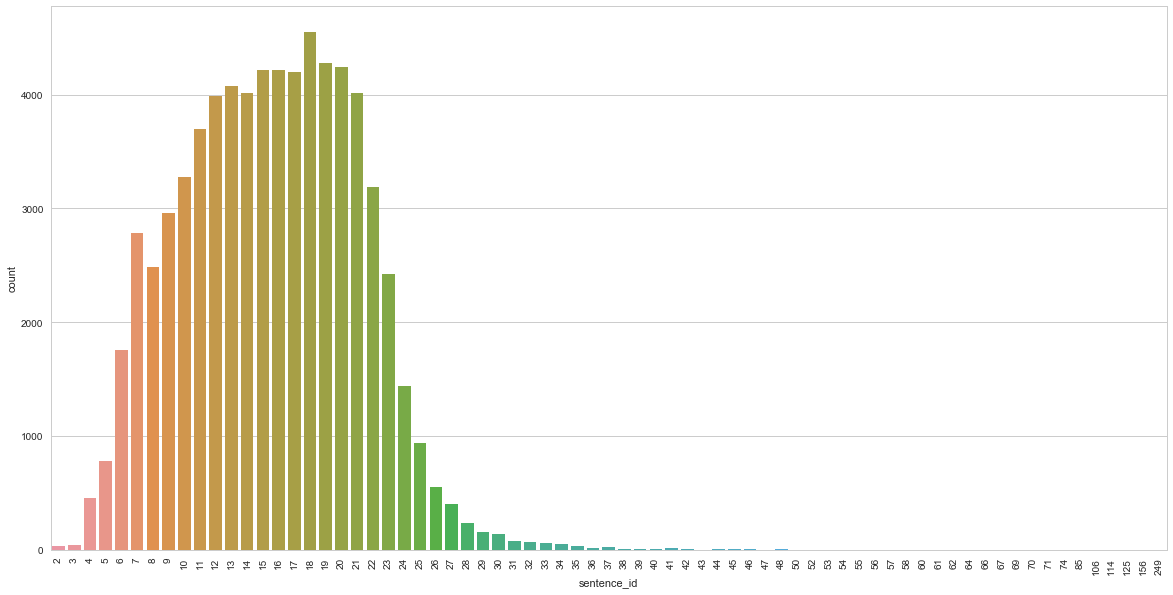

In [11]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.set_style("whitegrid")
count_length_fig = sns.countplot(test_sentences, ax=ax)
for item in count_length_fig.get_xticklabels():
    item.set_rotation(90)

#### Find the longest sentence in the train dataset

In [12]:
long_sentance = train_sentences[train_sentences == train_sentences.max()].index.values
long_sentance

array([520453], dtype=int64)

#### Print the longest sentence in train dataset

In [13]:
long_example = train[train.sentence_id==long_sentance[0]].before.values.tolist()
long_example= ' '.join(long_example)
long_example

"R . Naroll , V.L. Bullough & F. Naroll , Military Deterrence in History : A Pilot Cross Historical Survey , SUNY Press , 1974 H . Temporini & W. Haase , Aufstieg und Niedergang der romischen Welt : Geschichte und Kultur Roms im spiegel der neueren Forschung , Walter de GruyterE . Yarshater , The Cambridge History of Iran , Cambridge University Press , 1983 R . Syme & A.R. Birley , Anatolica : studies in Strabo , Oxford University Press , 1995 W.G. Sayles , Ancient Coin Collecting IV : Roman Provincial Coins ( Google eBook ) , F +W Media , Inc , 1998 P.M. Swan , The Augustan Succession : An Historical Commentary on Cassius Dio's Roman History , Books 55 - 56 ( 9 B.C. - A.D. 14 ) ( Google eBook ) , Oxford University Press , 2004 R.G. Hovannisian , The Armenian People from Ancient to Modern Times , Volume 1 : The Dynastic Periods : From Antiquity to the Fourteenth Century , Palgrave Macmillan , 2004 V.M. Kurkjian , A History of Armenia , Indo European Publishing , 2008 M.A. Ehrlich , Enc

#### Find the smallest sentence in the train dataset

In [14]:
small_sentance = train_sentences[train_sentences == train_sentences.min()].index.values
small_sentance

array([    41,    109,    144, ..., 747154, 747855, 747920], dtype=int64)

#### Print the smallest sentence in the train dataset

In [ ]:
long_sentance = train[train.sentence_id==small_sentance[0]].before.values.tolist()
long_sentance = ' '.join(long_example)
long_sentance

#### Total number of classes in the train dataset

In [15]:
#checking for unique token_id
len(train["class"].unique())

16

#### Print these classes

In [16]:
class_types = train["class"].unique()
print(class_types)

['PLAIN' 'PUNCT' 'DATE' 'LETTERS' 'CARDINAL' 'VERBATIM' 'DECIMAL' 'MEASURE'
 'MONEY' 'ORDINAL' 'TIME' 'ELECTRONIC' 'DIGIT' 'FRACTION' 'TELEPHONE'
 'ADDRESS']


#### Total number of words present in each class of the train dataset

In [17]:
train.groupby("class")["class"].count()

class
ADDRESS           522
CARDINAL       133744
DATE           258348
DECIMAL          9821
DIGIT            5442
ELECTRONIC       5162
FRACTION         1196
LETTERS        152795
MEASURE         14783
MONEY            6128
ORDINAL         12703
PLAIN         7353693
PUNCT         1880507
TELEPHONE        4024
TIME             1465
VERBATIM        78108
Name: class, dtype: int64

#### Total number of words changed in train set

In [18]:
train["change"] = 0
train.loc[train.before!=train.after, "change"] = 1
train["change"].value_counts()

0    9258602
1     659839
Name: change, dtype: int64

#### Most changed word in train dataset

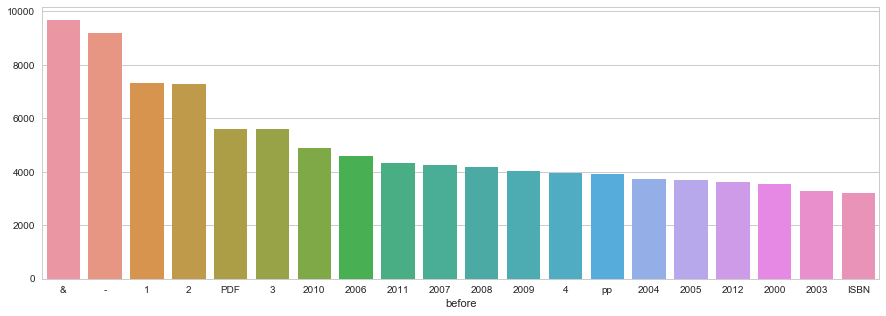

In [21]:
most_changed_words = train[train.change==1].groupby("before")["before"].count().sort_values(ascending=False).head(20)
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x=most_changed_words.index, y=most_changed_words.values)

#### Most Changed class in train dataset

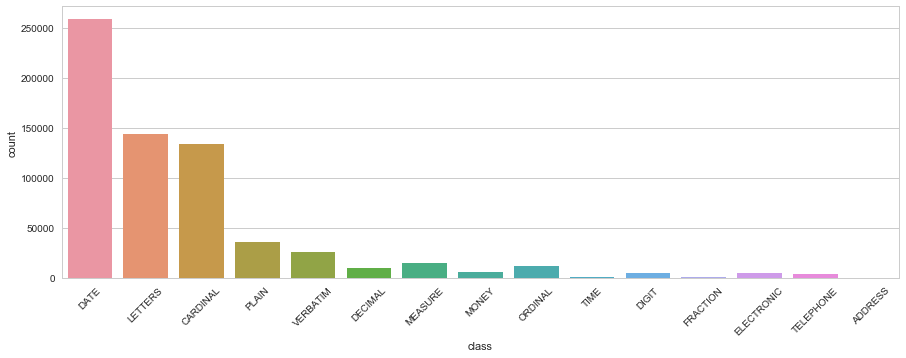

In [22]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
changes_classes_fig = sns.countplot(x="class", data=train[train.change==1])
for item in changes_classes_fig.get_xticklabels():
    item.set_rotation(45)

In [23]:
train[train['class']=='DATE'].head(10)

,sentence_id,token_id,class,before,after,change
10,1,0,DATE,2006,two thousand six,1
51,3,7,DATE,2007,two thousand seven,1
80,5,0,DATE,2008,two thousand eight,1
111,8,1,DATE,4 March 2014,the fourth of march twenty fourteen,1
147,11,1,DATE,"April 10, 2013",april tenth twenty thirteen,1
151,12,2,DATE,7 August 2007,the seventh of august two thousand seven,1
158,14,1,DATE,1987,nineteen eighty seven,1
211,18,12,DATE,1996,nineteen ninety six,1
256,22,1,DATE,22 September 2015,the twenty second of september twenty fifteen,1
367,29,2,DATE,"November 4, 2014",november fourth twenty fourteen,1


In [24]:
train[train['class']=='LETTERS'].head()

,sentence_id,token_id,class,before,after,change
11,1,1,LETTERS,IUCN,i u c n,1
115,9,2,LETTERS,BC,b c,1
159,14,2,LETTERS,ALCS,a l c s,1
201,18,2,LETTERS,C.,c,1
205,18,6,LETTERS,J.,j,1


In [25]:
train[train['class']=='PUNCT'].head()

,sentence_id,token_id,class,before,after,change
9,0,9,PUNCT,.,.,0
17,1,7,PUNCT,.,.,0
25,2,7,PUNCT,",",",",0
28,2,10,PUNCT,",",",",0
31,2,13,PUNCT,",",",",0


In [26]:
train[train['class']=='VERBATIM'].head()

,sentence_id,token_id,class,before,after,change
162,14,5,VERBATIM,-,-,0
279,24,3,VERBATIM,#,number,1
724,54,11,VERBATIM,&,and,1
980,75,2,VERBATIM,サ,サ,0
981,75,3,VERBATIM,イ,イ,0


In [27]:
train[train['class']=='CARDINAL'].head()

,sentence_id,token_id,class,before,after,change
95,6,3,CARDINAL,91,ninety one,1
116,9,3,CARDINAL,3,three,1
143,10,8,CARDINAL,35,thirty five,1
161,14,4,CARDINAL,2,two,1
280,24,4,CARDINAL,3,three,1


#### Seperating StopWords from data

In [29]:
import nltk
import random

In [34]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     D:\Softwares\Anaconda\lib\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [35]:
stop_words = set(stopwords.words("English"))
print(stop_words)

{'all', 'do', 'aren', 'those', 'after', 'him', 've', 'how', 'against', 'that', 'couldn', 'which', 'some', 't', 'his', 'then', 'your', 'don', 'whom', 'each', 'am', 'have', 'into', 'yourselves', 'herself', 'it', 'its', 'was', 'being', 'had', 'so', 'no', 'same', 'themselves', 'were', 'down', 'most', 'himself', 'this', 'in', 'theirs', 'ourselves', 'what', 'the', 'to', 'their', 'yourself', 'once', 'just', 're', 'does', 'from', 'didn', 'her', 'only', 'are', 'at', 'been', 'than', 'won', 'my', 'under', 'during', 'ma', 'any', 'up', 'other', 'yours', 'as', 'a', 'why', 'i', 'itself', 's', 'hadn', 'haven', 'while', 'mustn', 'she', 'above', 'about', 'an', 'below', 'by', 'having', 'both', 'can', 'because', 'myself', 'doing', 'but', 'with', 'they', 'further', 'our', 'these', 'over', 'where', 'shouldn', 'out', 'off', 'when', 'did', 'hasn', 'very', 'me', 'who', 'for', 'shan', 'ours', 'and', 'through', 'again', 'more', 'weren', 'if', 'there', 'here', 'needn', 'of', 'you', 'd', 'before', 'nor', 'be', 'y'

#### Gather all data that has changed from "before" to "after"

In [37]:
difference = dict()
for i in class_types:
    class_data = train.loc[train["class"] == i]
    difference[i] = class_data.loc[class_data["before"] != class_data["after"]]
print(difference)

{'PLAIN':          sentence_id  token_id  class          before              after  \
142               10         7  PLAIN             vol             volume   
165               14         8  PLAIN              vs             versus   
535               43         6  PLAIN           PbSO4  lead two sulphate   
556               44         6  PLAIN               -                 to   
651               49        16  PLAIN              st              saint   
776               58         7  PLAIN               -                 to   
790               59        11  PLAIN              st              saint   
1054              81         0  PLAIN             vol             volume   
1063              81         9  PLAIN             vol             volume   
1091              84         5  PLAIN          colour              color   
1223              95        15  PLAIN              st              saint   
1321             102        18  PLAIN        coloured            colored   
15

#### Checking the number of data that each class contains for before column

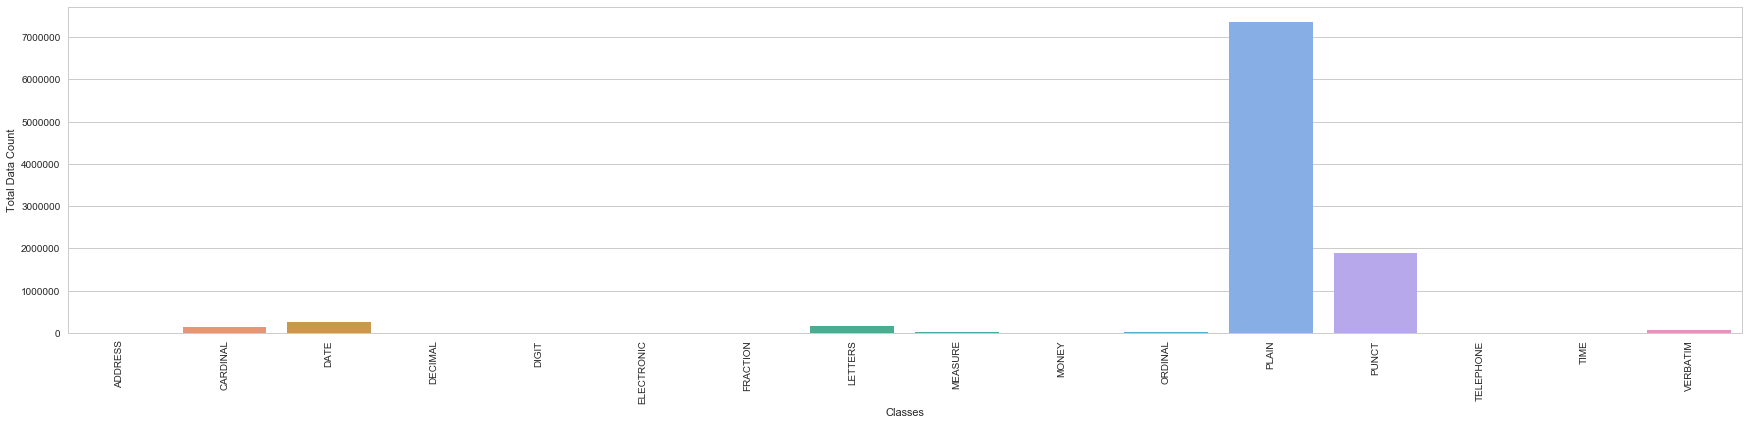

In [38]:
import seaborn as sns
group_class = train.groupby('class',as_index=False).count()

buf = sns.barplot(x=group_class['class'],y=group_class['before'])
buf.set(xlabel='Classes', ylabel='Total Data Count')

for x in buf.get_xticklabels():
    x.set_rotation(90)

#### Count of changed words in each class of train dataset

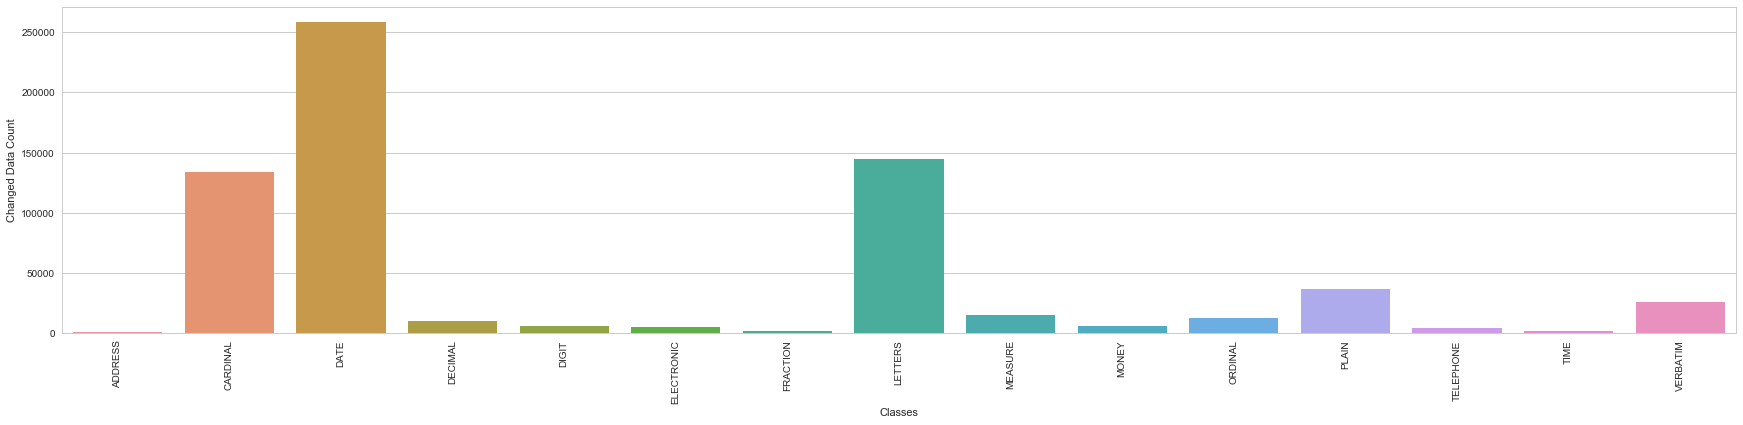

In [39]:
diff_data = train.loc[train["before"] != train["after"]]

group_class_change = diff_data.groupby('class',as_index=False).count()

buf = sns.barplot(x=group_class_change['class'],y=group_class_change['before'])
buf.set(xlabel='Classes', ylabel='Changed Data Count')

for x in buf.get_xticklabels():
    x.set_rotation(90)

#### Removed stopwords from the sentences using NLTK stopwords

In [40]:
filtered_sentence = []

for w in train["after"][:100]:
    if w not in stop_words:
        filtered_sentence.append(w)
        
print (filtered_sentence)

['Brillantaisia', 'genus', 'plant', 'family', 'Acanthaceae', '.', 'two thousand six', 'i u c n', 'Red', 'List', 'Threatened', 'Species', '.', 'Circa', 'Survive', 'draw', 'influences', 'soft', 'rock', ',', 'post', 'hardcore', ',', 'experimental', 'rock', ',', 'emo', ',', 'progressive', 'rock', ',', 'art', 'rock', ',', 'pop', 'musicians', '.', 'Circa', 'Survive', 'opened', 'My', 'Chemical', "Romance's", 'two thousand seven', 'shows', 'Worcester', 'Australian', 'New', 'Zealand', 'shows', 'well', '.', 'It', 'greyish', 'green', ',', 'densely', 'hairy', 'stem', 'alternate', ',', 'palmately', 'lobed', 'leaves', '.', 'two thousand eight', 'Tour', 'Madina', 'Lake', ',', 'Coheed', 'Cambria', 'Fightstar', '.', 'Greek', 'National', 'Road', 'ninety one', '(', 'Athens', '—', 'Sounio']


#### Working with NLTK

In [41]:
from __future__ import print_function
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

D:\Softwares\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Most common words

In [61]:
filtered_sentence = []

for w in train["after"]:
    if w not in stop_words:
        filtered_sentence.append(w)
        
filtered_sentence = nltk.FreqDist(filtered_sentence)        
print (filtered_sentence.most_common(15))

[('.', 749454), (',', 466876), ('"', 267301), ('(', 135525), (')', 131339), ('The', 121028), (':', 64186), ('In', 33360), ('He', 29874), ('It', 22572), (';', 21435), ('also', 20415), ('two', 20084), ('one', 18927), ("'", 16020)]


In [62]:
print(filtered_sentence[","])
print(filtered_sentence["."])

466876
749454


In [63]:
df2=pd.read_csv("en_test.csv")
df2.before.fillna(value=",",inplace=True)
df2.before.fillna(value=".", inplace=True)
X = df2.drop('token_id', axis=1)
y = df2.token_id
print(df2)

         sentence_id  token_id          before
0                  0         0         Another
1                  0         1       religious
2                  0         2          family
3                  0         3              is
4                  0         4              of
5                  0         5          Hazrat
6                  0         6          Sayyed
7                  0         7           Ahmad
8                  0         8             and
9                  0         9             his
10                 0        10          nephew
11                 0        11          Hazrat
12                 0        12           Abdul
13                 0        13             Haq
14                 0        14               .
15                 1         0             The
16                 1         1            free
17                 1         2          webapp
18                 1         3   functionality
19                 1         4        contains
20           

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(y_train)

310666      5
917373     19
913814      1
666146     19
626852      4
655745      6
217874      5
159767      9
77731       5
277613      1
749499      7
291283     19
808273      0
1088193    10
143968      1
913228      2
710381     10
578006      0
102185      7
849858      1
121978      6
622055      9
16500       1
308860      7
343423     10
373455      5
510571     11
43525       0
11618       2
6434        3
           ..
645097     12
296022      2
699870     17
1074679    11
148209      0
412649      2
745431      1
246322      1
1005966    11
188317      7
365212      0
806378      8
401660      4
575956     20
691090      4
1070334     0
513300      6
1041586     9
925255      8
966604     10
413825     15
229520      6
1070016     8
73349       3
371403      2
836489      2
491263     13
470924      8
491755      0
128037      7
Name: token_id, Length: 816423, dtype: int64


In [54]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

In [65]:
from itertools import islice
df=train
dfDifference = df[df['before'] != df['after']]
df['b'] = 0
df['a'] = 0
import numpy as np
unique_col = df['before'].unique()
from itertools import islice
dictionary = dict(zip(dfDifference['before'],dfDifference['after']))
print(list(islice(dictionary.keys(),5)))
print(list(islice(dictionary.values(),5)))
before_list = dict(zip(unique_col, range(1,np.count_nonzero(unique_col)))) 

for k,v in df.iterrows():
    if before_list.get(v['before']) is not None:
        num = before_list[v['before']]
        df.set_value(k,'b',num)
for k,v in df.iterrows():
    if dictionary.get(v['before']) is not None:
        df.set_value(k,'y',1)

['2006', 'IUCN', '2007', '2008', '91']
['two thousand six', 'i u c n', 'two thousand seven', 'two thousand eight', 'ninety one']


In [66]:
def isNum(key):
    if is_float(key) or re.match(r'^-?[0-9]\d*?$', key.replace(',','')): return True
    else: return False

def is_float(string):
    try:
        return float(string.replace(',','')) and "." in string # True if string is a number contains a dot
    except ValueError:  # String is not a number
        return False
is_float("8.500")

True

In [67]:
def letters(x):
    try:
        x = re.sub('[^a-zA-Z]', '', x)
        x = x.lower()
        result_string = ''
        for i in range(len(x)):
            result_string = result_string + x[i] + ' '
        return(result_string.strip())  
    except:
        return x
letters("HellO")

'h e l l o'

In [56]:
import n2w
def cardinal(x):
    try:
        if re.match('.*[A-Za-z]+.*', x):
            return n2w.convert(x)
        x = re.sub(',', '', x, count = 10)
        
        if(re.match('.+\..*', x)):
            print("12")
            x = p.number_to_words(float(x))
        elif re.match('\..*', x): 
            print("12434")
            x = p.number_to_words(float(x))
            x = x.replace('zero ', '', 1)
        else:
            print("12390")
            x = p.number_to_words(int(x))
        x = x.replace('zero', 'o')    
        print("34444444")
        x = re.sub('-', ' ', x, count=10)
        x = re.sub(' and','',x, count = 10)
        return x
    except:
        return n2w.convert(x)
print(cardinal("123"))

12390
one hundred twenty three


#### Function to written form of amount to spoken form

In [69]:
import n2w
def money(x):
    try:
        if re.match('^/$', x):
            x = x.replace('$','')
            if len(x.split(' ')) == 1:
                if re.match('.*M|m$',x):
                    x = x.replace('M', '')
                    x = x.replace('m', '')
                    text = cardinal(x)
                    x = text + ' million dollars'
                elif re.match('.*b|B$', x):
                    x = x.replace('B', '')
                    x = x.replace('b', '')
                    text = cardinal(x)
                    x = text + ' million dollars'
                else:
                    text = cardinal(x)
                    x = text + ' dollars'
                return x.lower()
            elif len(x.split(' ')) == 2:
                text = cardinal(x.split(' ')[0])
                if x.split(' ')[1].lower() == 'million':
                    x = text + ' million dollars'
                elif x.split(' ')[1].lower() == 'billion':
                    x = text + ' billion dollars'
                return x.lower()
        if re.match('^US\$', x):
            x = x.replace('US$','')
            if len(x.split(' ')) == 1:
                if re.match('.*M|m$', x):
                    x = x.replace('M', '')
                    x = x.replace('m', '')
                    text = cardinal(x)
                    x = text + ' million dollars'
                elif re.match('.*b|B$', x):
                    x = x.replace('b', '')
                    x = x.replace('B', '')
                    text = cardinal(x)
                    x = text + ' million dollars'
                else:
                    text = cardinal(x)
                    x = text + ' dollars'
                return x.lower()
            elif len(x.split(' ')) == 2:
                text = cardinal(x.split(' ')[0])
                if x.split(' ')[1].lower() == 'million':
                    x = text + ' million dollars'
                elif x.split(' ')[1].lower() == 'billion':
                    x = text + ' billion dollars'
                return x.lower()

        elif re.match('^£', x):
            x = x.replace('£','')
            if len(x.split(' ')) == 1:
                if re.match('.*M|m$', x):
                    x = x.replace('M', '')
                    x = x.replace('m', '')
                    text = cardinal(x)
                    x = text + ' million pounds'
                elif re.match('.*b|B$', x):
                    x = x.replace('b', '')
                    x = x.replace('B', '')
                    text = cardinal(x)
                    x = text + ' million pounds'
                else:
                    text = cardinal(x)
                    x = text + ' pounds'
                return x.lower()
            elif len(x.split(' ')) == 2:
                text = cardinal(x.split(' ')[0])
                if x.split(' ')[1].lower() == 'million':
                    x = text + ' million pounds'
                elif x.split(' ')[1].lower() == 'billion':
                    x = text + ' billion pounds'
                return x.lower()
            
        elif re.match('^€', x):
            x = x.replace('€','')
            if len(x.split(' ')) == 1:
                if re.match('.*M|m$', x):
                    x = x.replace('M', '')
                    x = x.replace('m', '')
                    text = cardinal(x)
                    x = text + ' million euros'
                elif re.match('.*b|B$', x):
                    x = x.replace('B', '')
                    x = x.replace('b', '')
                    text = cardinal(x)
                    x = text + ' million euros'
                else:
                    text = cardinal(x)
                    x = text + ' euros'
                return x.lower()
            elif len(x.split(' ')) == 2:
                text = cardinal(x.split(' ')[0])
                if x.split(' ')[1].lower() == 'million':
                    x = text + ' million euros'
                elif x.split(' ')[1].lower() == 'billion':
                    x = text + ' billion euros'
                return x.lower()  
    except:    
        return(x)
word = money("10")
print(money('10M'))

None
